In [1]:
import pandas as pd
import numpy as np
import numpy as snp
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
train_df = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\제주 특산물\train.csv')
test_df = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\제주 특산물\test.csv')

international = pd.read_csv(r'C:\Users\dlwks\OneDrive\바탕 화면\VSCode\제주 특산물\international_trade.csv')

- TG: 감귤
- BC: 브로콜리
- RD: 무
- CR: 당근
- CB: 양배추
- corporation : 법인 A부터 F 존재
- location : 지역코드
- J : 제주도 제주시
- S : 제주도 서귀포시
- supply(kg) : 유통된 물량, kg 단위
- price(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위

In [ ]:
# 공휴일
holi_weekday = ['2019-01-01', '2019-02-04', '2019-02-05', '2019-02-06', '2019-03-01', '2019-05-05', '2019-05-12', '2019-06-06', '2019-08-15', '2019-09-12', '2019-09-13', '2019-09-14', '2019-10-03', '2019-10-09', '2019-12-25',
                '2020-01-01' ,'2020-01-24' ,'2020-01-25', '2020-01-26', '2020-03-01', '2020-04-30', '2020-05-05', '2020-06-06', '2020-08-15', '2020-08-17', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-09', '2020-12-25',
                '2021-01-01' ,'2021-02-11' ,'2021-02-12', '2021-02-13', '2021-03-01', '2021-05-05', '2021-05-19', '2021-06-06', '2021-08-15', '2021-09-20', '2021-09-21', '2021-09-22', '2021-10-03', '2021-10-09', '2021-12-25',
                '2022-01-01' ,'2022-01-31' ,'2022-02-01', '2022-02-02', '2022-03-01', '2022-05-05', '2022-05-08', '2022-06-06', '2022-08-15', '2022-09-09', '2022-09-10', '2022-09-11', '2022-09-12', '2022-10-03', '2022-10-09', '2020-10-10', '2022-12-25',
                '2023-01-01' ,'2023-01-21' ,'2023-01-22', '2023-01-23', '2023-01-24', '2023-03-01']

In [3]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month
train_df['day'] = train_df['timestamp'].dt.day
train_df['day_of_week'] = train_df['timestamp'].dt.dayofweek
train_df['sin_month'] = np.sin(2 * np.pi * train_df['month'] / 12)
train_df['cos_month'] = np.cos(2 * np.pi * train_df['month'] / 12)
train_df['sin_date'] = np.sin(2 * np.pi * (train_df['month'] + train_df['day'] / 31) / 12)
train_df['cos_date'] = np.cos(2 * np.pi * (train_df['month'] + train_df['day'] / 31) / 12)
train_df['sin_dayofweek'] = np.sin(2 * np.pi * (train_df['day_of_week'] + 1) / 7)
train_df['cos_dayofweek'] = np.cos(2 * np.pi * (train_df['day_of_week'] + 1) / 7)
train_df['holiday'] = np.where((train_df.day_of_week >= 5) | (train_df.timestamp.dt.strftime('%Y-%m-%d').isin(holi_weekday)), 1, 0)

test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month
test_df['day'] = test_df['timestamp'].dt.day
test_df['day_of_week'] = test_df['timestamp'].dt.dayofweek
test_df['sin_month'] = np.sin(2 * np.pi * test_df['month'] / 12)
test_df['cos_month'] = np.cos(2 * np.pi * test_df['month'] / 12)
test_df['sin_date'] = np.sin(2 * np.pi * (test_df['month'] + test_df['day'] / 31) / 12)
test_df['cos_date'] = np.cos(2 * np.pi * (test_df['month'] + test_df['day'] / 31) / 12)
test_df['sin_dayofweek'] = np.sin(2 * np.pi * (test_df['day_of_week'] + 1) / 7)
test_df['cos_dayofweek'] = np.cos(2 * np.pi * (test_df['day_of_week'] + 1) / 7)
test_df['holiday'] = np.where((test_df.day_of_week >= 5) | (test_df.timestamp.dt.strftime('%Y-%m-%d').isin(holi_weekday)), 1, 0)

In [4]:
# month_mean 계산
price_month_mean = pd.pivot_table(train_df, values = 'price(원/kg)', index = ['corporation', 'month'], aggfunc = np.mean).reset_index()
price_month_mean.columns = ['corporation', 'month', 'month_mean']

# month_std 계산
price_month_std = pd.pivot_table(train_df, values = 'price(원/kg)', index = ['corporation', 'month'], aggfunc = np.std).reset_index()
price_month_std.columns = ['corporation', 'month', 'month_std']

train_df = train_df.merge(price_month_mean, on = ['corporation', 'month'], how = 'left')
test_df = test_df.merge(price_month_mean, on = ['corporation', 'month'], how = 'left')

train_df = train_df.merge(price_month_std, on = ['corporation', 'month'], how = 'left')
test_df = test_df.merge(price_month_std, on = ['corporation', 'month'], how = 'left')

train_df = train_df.reset_index(drop = True)

In [ ]:
# 품목별 평균 가격 계산
item_mean_price = train_df.groupby('item')['price(원/kg)'].mean().reset_index()
item_mean_price.columns = ['item', 'item_mean_price']

train_df = train_df.merge(item_mean_price, on='item', how='left')
test_df = test_df.merge(item_mean_price, on='item', how='left')

# 법인별 평균 가격 계산
corp_mean_price = train_df.groupby('corporation')['price(원/kg)'].mean().reset_index()
corp_mean_price.columns = ['corporation', 'corp_mean_price']

train_df = train_df.merge(corp_mean_price, on='corporation', how='left')
test_df = test_df.merge(corp_mean_price, on='corporation', how='left')

# 지역별 평균 가격 계산
location_mean_price = train_df.groupby('location')['price(원/kg)'].mean().reset_index()
location_mean_price.columns = ['location', 'location_mean_price']

train_df = train_df.merge(location_mean_price, on='location', how='left')
test_df = test_df.merge(location_mean_price, on='location', how='left')

In [5]:
train_df.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,day_of_week,sin_month,cos_month,sin_dayofweek,cos_dayofweek,holiday,rolling_mean_supply,price_per_kg
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1,0.5,0.866025,0.974928,-0.222521,0,0.000000,0.000000
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,2,0.5,0.866025,0.433884,-0.900969,0,0.000000,0.000000
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3,0.5,0.866025,-0.433884,-0.900969,0,20200.333333,0.028514
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,4,0.5,0.866025,-0.974928,-0.222521,0,21400.250000,0.056320
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,5,0.5,0.866025,-0.781831,0.623490,1,23590.600000,0.038637


In [6]:
train_df.item.value_counts()

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

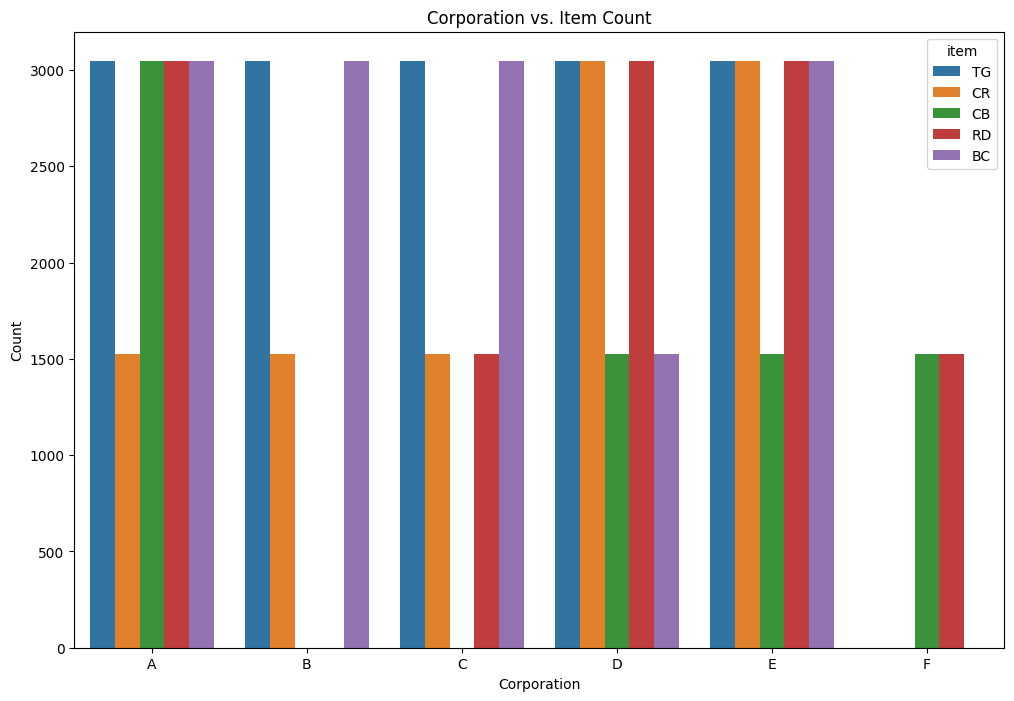

In [7]:
df_plot = train_df[['corporation', 'location', 'item']]

plt.figure(figsize=(12, 8))
sns.countplot(x='corporation', hue='item', data=df_plot, dodge=True)
plt.title('Corporation vs. Item Count')
plt.xlabel('Corporation')
plt.ylabel('Count')
plt.show()

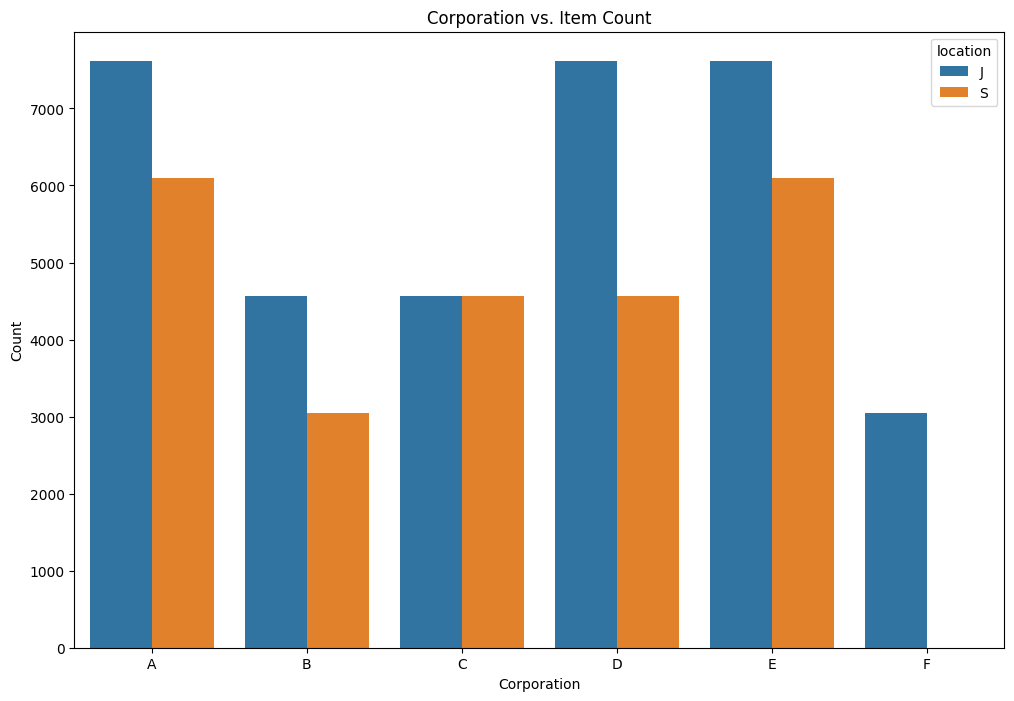

In [8]:
plt.figure(figsize=(12, 8))
sns.countplot(x='corporation', hue='location', data=df_plot, dodge=True)
plt.title('Corporation vs. Item Count')
plt.xlabel('Corporation')
plt.ylabel('Count')
plt.show()

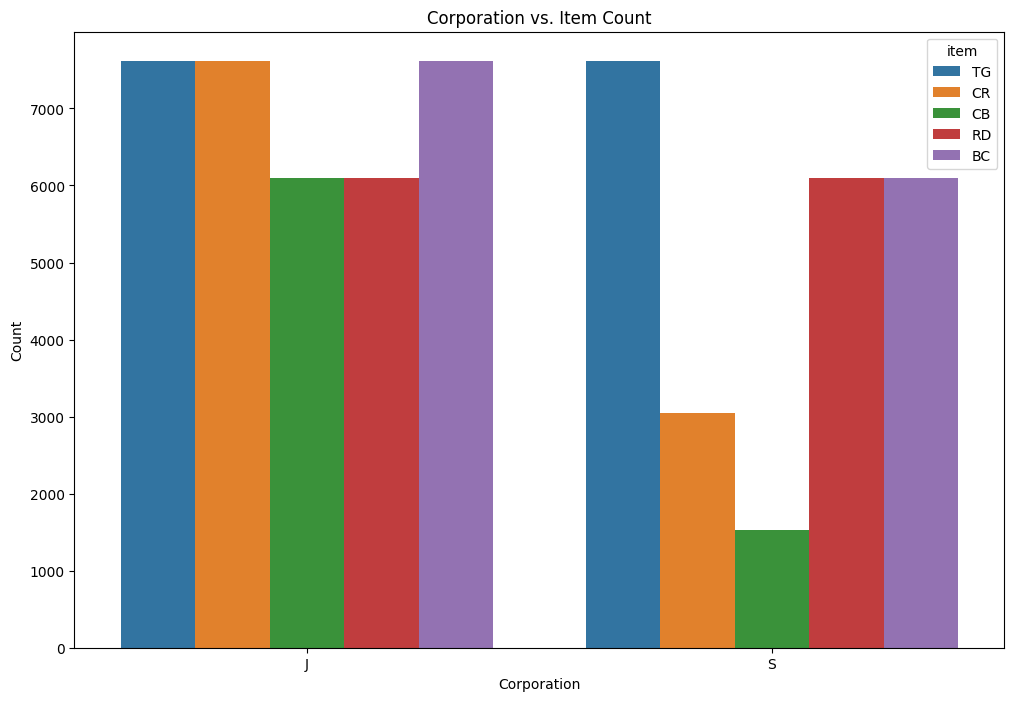

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(x='location', hue='item', data=df_plot, dodge=True)
plt.title('Corporation vs. Item Count')
plt.xlabel('Corporation')
plt.ylabel('Count')
plt.show()

In [10]:
international.head()

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
